Net(
  (hidden_layer): Linear(in_features=1, out_features=100, bias=True)
  (hidden_1_layer): Linear(in_features=100, out_features=30, bias=True)
  (predict_layer): Linear(in_features=30, out_features=1, bias=True)
  (dropout): Dropout(p=0, inplace=False)
)


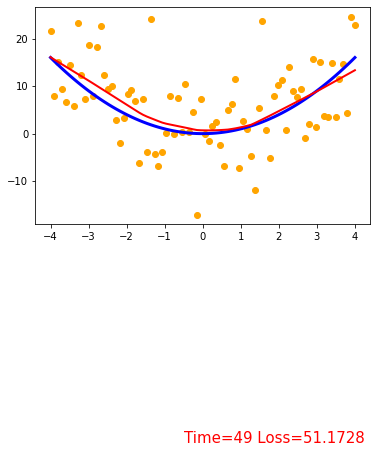

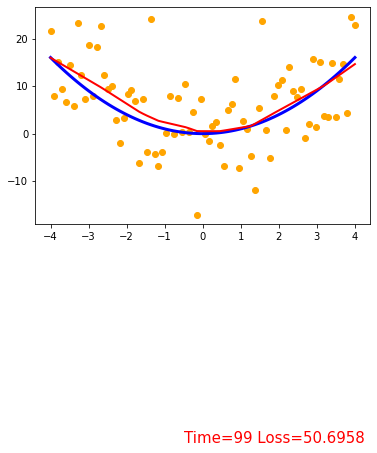

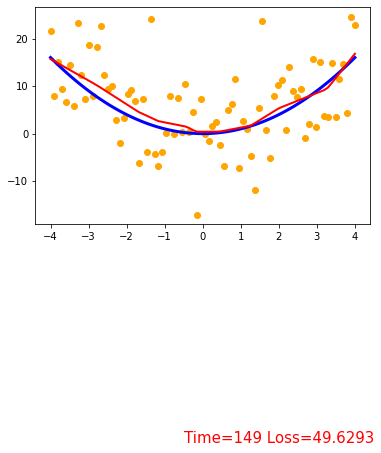

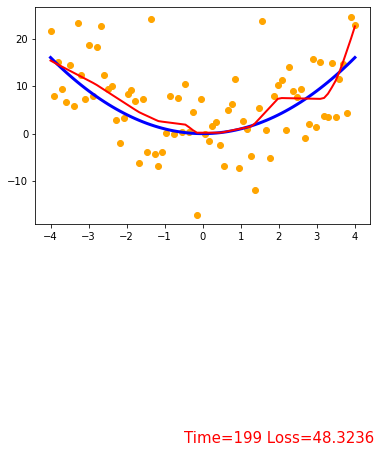

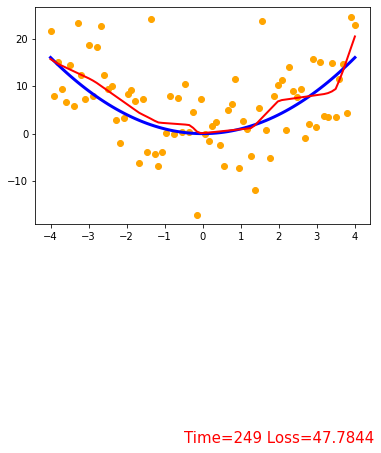

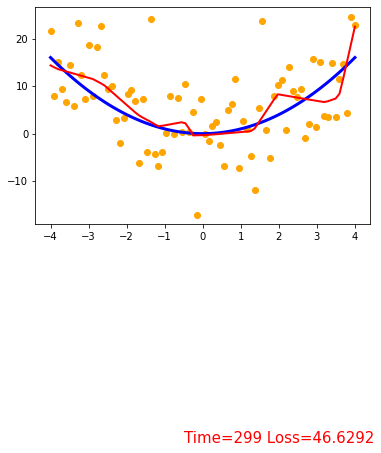

In [48]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F

TRAIN_TIMES = 300
INPUT_FEATURE_DIM = 1
OUTPUT_FEATURE_DIM = 1
NEURON_NUM = 100
HIDDEN_NUM = 30
LEARNING_RATE = 0.1
Weight_decay =0 # 0.3
DROPOUT = 0 #0.2
# SEED = 1
# torch.manual_seed(SEED)
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden,n_hidden_1, n_output):
        super(Net, self).__init__()
        self.hidden_layer = torch.nn.Linear(n_feature, n_hidden)
        self.hidden_1_layer = torch.nn.Linear(n_hidden, n_hidden_1)
        self.predict_layer = torch.nn.Linear(n_hidden_1, n_output)
        self.dropout = torch.nn.Dropout(DROPOUT)
    def forward(self, x):
        x = self.hidden_layer(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.hidden_1_layer(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.predict_layer(x)
        x = self.dropout(x)
        return x


x_data = torch.unsqueeze(torch.linspace(-4, 4, 80), dim=1)
y_data = x_data.pow(2) + 8 * torch.randn(x_data.size())
y_data_real = x_data.pow(2)

# 建立网络
net = Net(n_feature=INPUT_FEATURE_DIM, n_hidden=NEURON_NUM, n_hidden_1=HIDDEN_NUM,n_output=OUTPUT_FEATURE_DIM)
print(net)


optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE,weight_decay=Weight_decay)
loss_func = torch.nn.MSELoss()

for i in range(TRAIN_TIMES):
    prediction = net(x_data)
    loss = loss_func(prediction, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 可视化训练结果
    if (i+1) % 50 == 0:
        # 清空上一次显示结果
        plt.cla()
        # 无误差真值曲线
        plt.plot(x_data.numpy(), y_data_real.numpy(), c='blue', lw='3')
        # 有误差散点
        plt.scatter(x_data.numpy(), y_data.numpy(), c='orange')
        # 实时预测的曲线
        plt.plot(x_data.numpy(), prediction.data.numpy(), c='red', lw='2')
        plt.text(-0.5, -65, 'Time=%d Loss=%.4f' % (i, loss.data.numpy()), fontdict={'size': 15, 'color': 'red'})
        plt.pause(0.1)

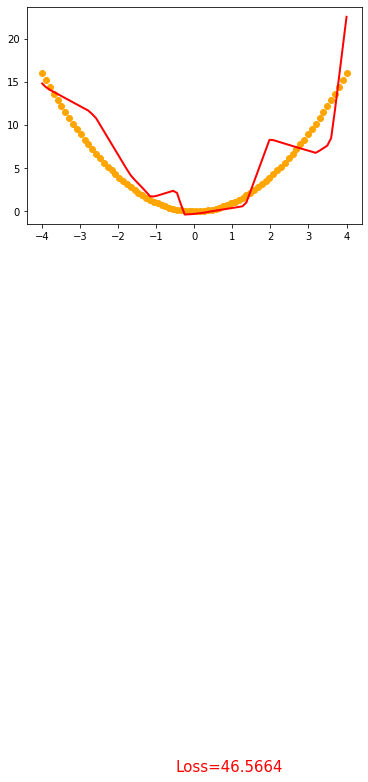

In [49]:
net.eval()
test_x_data = torch.unsqueeze(torch.linspace(-4, 4, 80), dim=1)
test_y_data = test_x_data.pow(2)
test_y_data_real = test_x_data.pow(2)
prediction = net(test_x_data)
loss = loss_func(prediction, y_data)
plt.cla()
# 有误差散点
plt.scatter(test_x_data.numpy(), test_y_data.numpy(), c='orange')
# 实时预测的曲线
plt.plot(x_data.numpy(), prediction.data.numpy(), c='red', lw='2')
plt.text(-0.5, -65, 'Loss=%.4f' % (loss.data.numpy()), fontdict={'size': 15, 'color': 'red'})
plt.pause(0.1)